In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import phik
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
import pickle



### 1. Data Loading

In this case, we have three data sets with the same columns but different sizes and data. Unlike df1 and df2, df3 has a target variable with three classes: 0, 1 and 2, representing different types of diabetes (1. Prediabetes, 2. Diabetes, 0. No diabetes). Since most of the data are in binary format (0 or 1), we will apply a transformation to df3 to convert the target variable into binary format (0 or 1), indicating whether diabetes is present or not.



In [2]:
df1 = pd.read_csv("./data/dia1.csv")
df2 = pd.read_csv("./data/dia2.csv")
df3 = pd.read_csv("./data/dia3.csv")

In [3]:
df3["Diabetes_binary"] = df3['Diabetes_012']
df3.drop(['Diabetes_012'], inplace=True, axis =1)

In [4]:
df = pd.concat([df1, df2, df3])
df["Diabetes_binary"].replace(2, 1, inplace=True)

## 2. Machine learning problem
In this case we are faced with a supervised binary classification problem (has or has not diabetics)

In [5]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    467383
1.0    110669
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 578052 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   HighChol              578052 non-null  float64
 3   CholCheck             578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   HeartDiseaseorAttack  578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   Fruits                578052 non-null  float64
 10  Veggies               578052 non-null  float64
 11  HvyAlcoholConsump     578052 non-null  float64
 12  AnyHealthcare         578052 non-null  float64
 13  NoDocbcCost           578052 non-null  float64
 14  GenHlth               578052 non-null  float64
 15  MentH

| Columna | Significado                                            |
|---------|--------------------------------------------------------|
| 0       | Diabetes_binary: Variable binaria que indica si la persona tiene diabetes (1) o no (0).    |
| 1       | HighBP: Indica si la persona tiene presión arterial alta (1) o no (0).                  |
| 2       | HighChol: Indica si la persona tiene colesterol alto (1) o no (0).                      |
| 3       | CholCheck: Indica si la persona se ha hecho chequeos de colesterol (1) o no (0).         |
| 4       | BMI: Índice de Masa Corporal de la persona.                                               |
| 5       | Smoker: Indica si la persona es fumadora (1) o no (0).                                   |
| 6       | Stroke: Indica si la persona ha tenido un derrame cerebral (1) o no (0).                 |
| 7       | HeartDiseaseorAttack: Indica si la persona ha tenido enfermedad cardíaca o ataque cardíaco (1) o no (0). |
| 8       | PhysActivity: Nivel de actividad física de la persona.                                    |
| 9       | Fruits: Frecuencia con la que la persona consume frutas.                                  |
| 10      | Veggies: Frecuencia con la que la persona consume vegetales.                               |
| 11      | HvyAlcoholConsump: Indica si la persona consume alcohol pesadamente (1) o no (0).         |
| 12      | AnyHealthcare: Indica si la persona ha recibido algún tipo de atención médica (1) o no (0). |
| 13      | NoDocbcCost: Indica si la persona ha evitado la atención médica debido a los costos (1) o no (0). |
| 14      | GenHlth: Estado de salud general de la persona.                                            |
| 15      | MentHlth: Estado de salud mental de la persona.                                            |
| 16      | PhysHlth: Estado de salud física de la persona.                                            |
| 17      | DiffWalk: Indica si la persona tiene dificultades para caminar (1) o no (0).               |
| 18      | Sex: Género de la persona (1. Masculino, 2. Femenino).                                     |
| 19      | Age: Edad de la persona.                                                                     |
| 20      | Education: Nivel educativo de la persona.                                                  |
| 21      | Income: Nivel de ingresos de la persona.                                                   |


## 3. Train and test split
Since we have more than 500,000 rows of data, in this case we will reserve 20% of the data for the test set and train our model with the remaining 80%.

In [7]:
X = df.drop(columns=['Diabetes_binary'])  
y = df['Diabetes_binary']  

# Split the data into training and test sets (e.g., 80% for training and 20% for test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [8]:
X_train.shape

(462441, 21)

In [9]:
y_train.value_counts()


Diabetes_binary
0.0    373869
1.0     88572
Name: count, dtype: int64

# 4. Target
We observe that 20% of the target has diabetes versus 80% who do not, the target is unbalanced but not in a very extreme way.

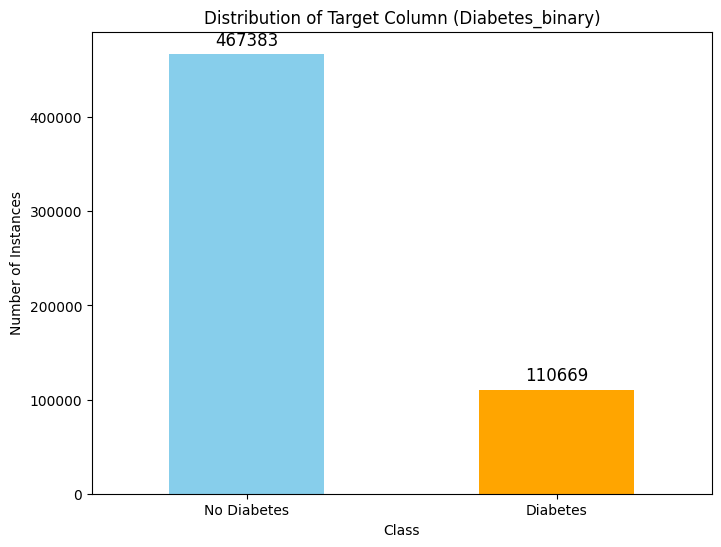

In [10]:
target_counts = df["Diabetes_binary"].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = target_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Add data tags
for i in range(len(target_counts)):
    plt.text(i, target_counts[i] + 5000, str(target_counts[i]), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Target Column (Diabetes_binary)')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()


# Understanding the variables
All the variables in my df are numeric, something that has simplified a lot the cleaning of it. As we observe in the following cell all are of type float64.

In [11]:
X_train.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [13]:
# Iterate over each column and display the value counts
for col in X_train.columns:
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    print(f"Value counts of column '{col}':")
    print(df[col].value_counts())

''''The only column that could be considered continuous numeric is BMI the rest are binary or with less than 10 categories. 
binary or with less than 10 categories.'''


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts of column 'HighBP':
HighBP
0.0    320562
1.0    257490
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts of column 'HighChol':
HighChol
0.0    325707
1.0    252345
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts of column 'CholCheck':
CholCheck
1.0    557363
0.0     20689
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts of column 'BMI':
BMI
27.0    55539
26.0    46099
24.0    43492
25.0    38323
28.0    37673
        ...  
78.0        3
85.0        3
91.0        2
90.0        2
96.0        2
Name: count, Length: 84, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Value counts of column 'Smoker':
Smoker
0.0    319608
1.0    258444
Name: count, dtype: int64
xxxxxxxxxxxxxxxxxxxxxxxxxxxx

"'The only column that could be considered continuous numeric is BMI the rest are binary or with less than 10 categories. \nbinary or with less than 10 categories."

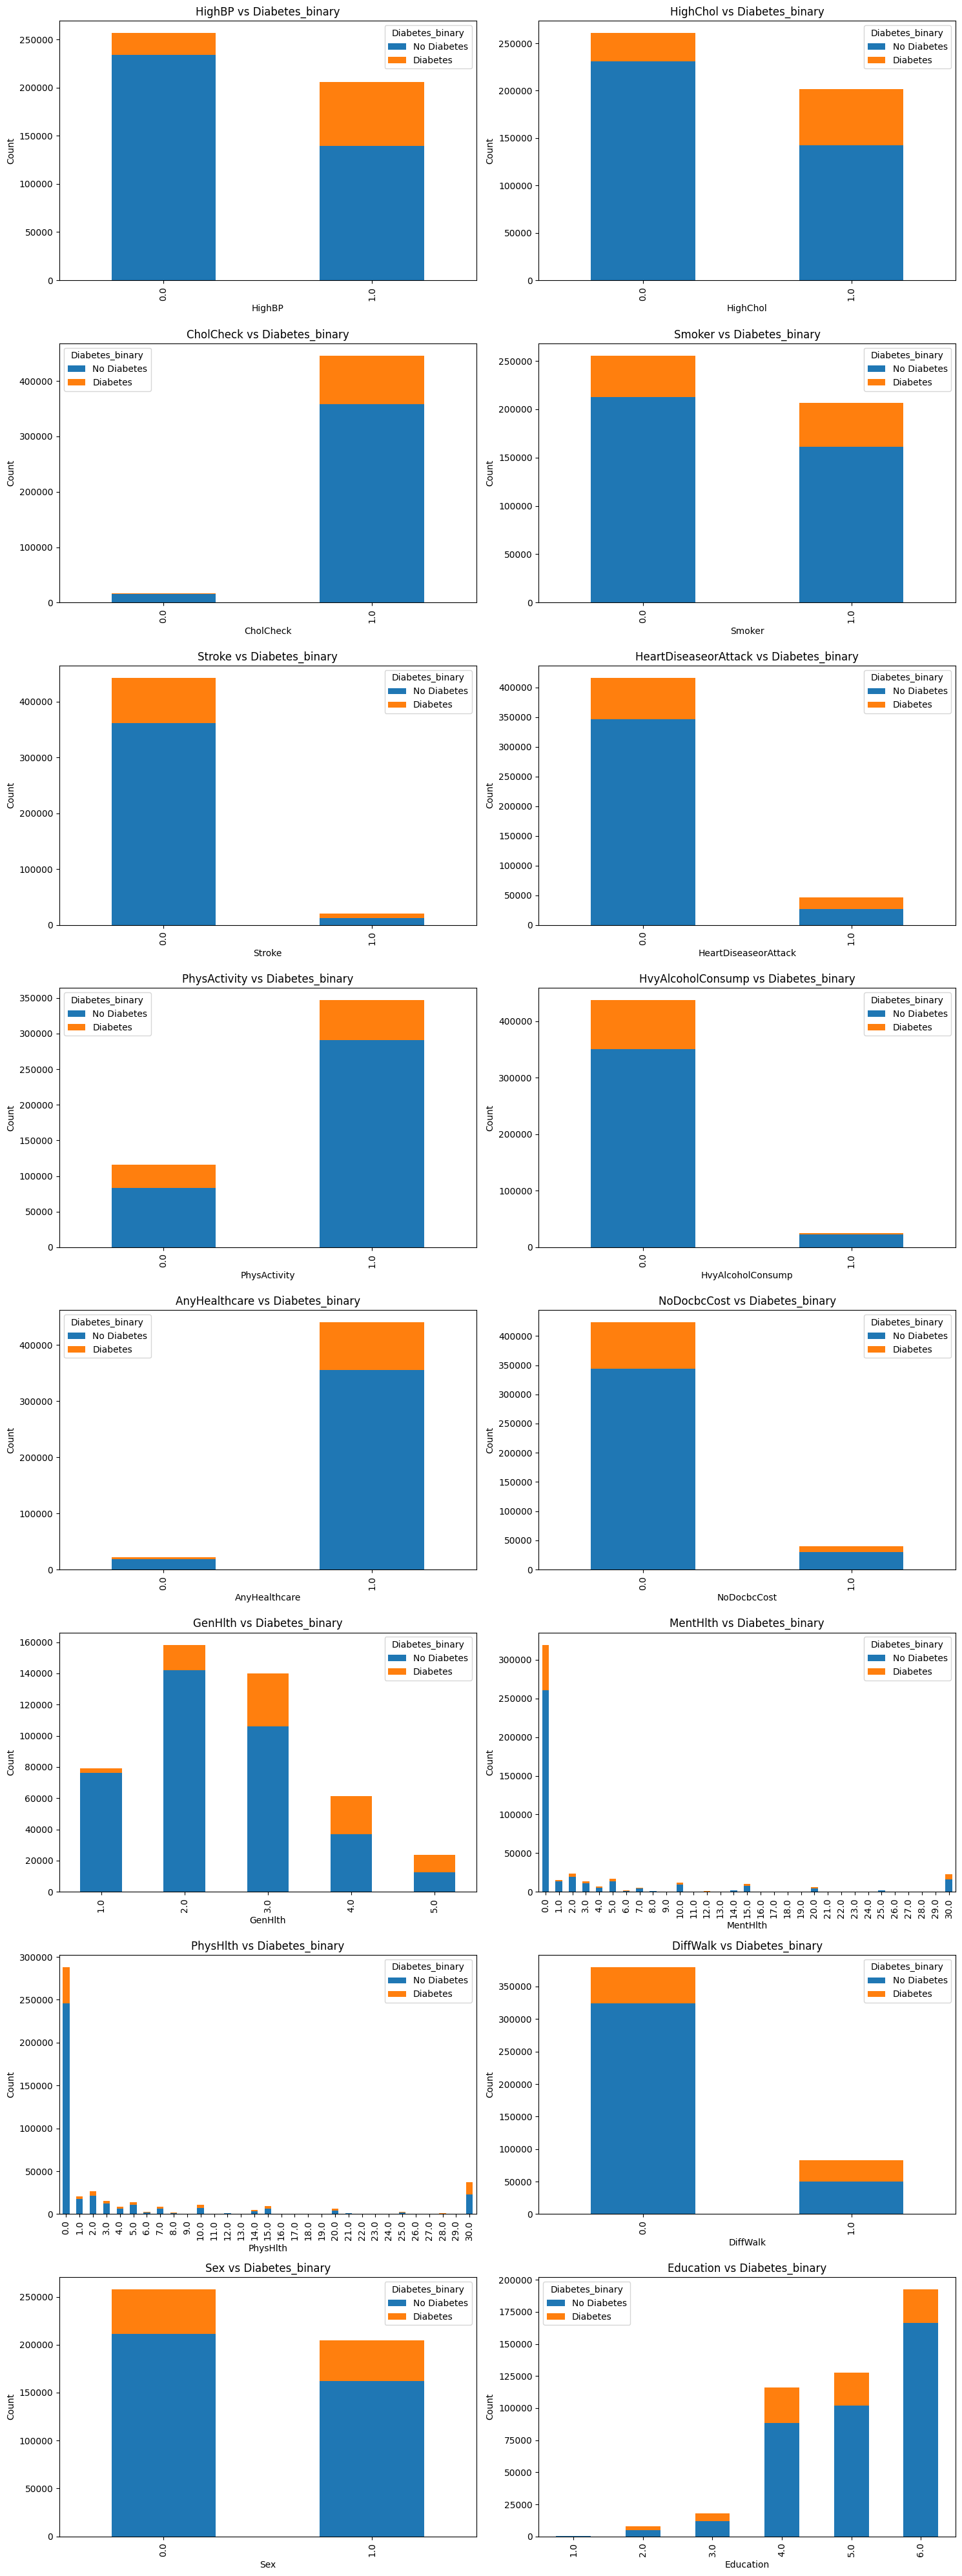

In [15]:
#I select the best looking categoricals 


categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                        'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 
                        'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 
                        'PhysHlth', 'DiffWalk', 'Sex', 'Education']

# Calculate the number of rows needed
num_plots = len(categorical_features)
num_rows = num_plots // 2
if num_plots % 2 != 0:
    num_rows += 1

# Create subgraphs with 3 columns and the appropriate number of rows
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# We create a facing bar chart for each categorical feature.
for i, feature in enumerate(categorical_features):
    # We calculate the coordinates of the subgraph.
    row = i // 2
    col = i % 2
    
    # We group by categorical feature and target variable.
    grouped = X_train.groupby([feature, y_train]).size().unstack()
    
    # We plot in the corresponding subchart
    ax = axes[row, col]
    grouped.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{feature} vs Diabetes_binary')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Diabetes_binary', labels=['No Diabetes', 'Diabetes'])

# We adjust the spacing between subgraphs and show
plt.tight_layout()
plt.show()



# Correlation

Correlation between variables is a crucial aspect of understanding the relationships and dependencies within the data. By examining the correlation matrix, we can identify which variables are strongly correlated, which can help in feature selection and model building.


In [16]:
# Concatenate X_train and y_train in a single DataFrame
df_concat = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation between features and target.
correlation_with_target = df_concat.corr()[y_train.name].sort_values(ascending=False)

print(correlation_with_target)



Diabetes_binary         1.000000
GenHlth                 0.326362
HighBP                  0.295003
BMI                     0.242039
DiffWalk                0.238788
HighChol                0.227221
Age                     0.202508
HeartDiseaseorAttack    0.191778
PhysHlth                0.187777
Stroke                  0.113838
MentHlth                0.078255
CholCheck               0.075130
Smoker                  0.067493
NoDocbcCost             0.036993
Sex                     0.034894
AnyHealthcare           0.017102
Fruits                 -0.043509
Veggies                -0.063141
HvyAlcoholConsump      -0.064742
PhysActivity           -0.131476
Education              -0.140243
Income                 -0.184052
Name: Diabetes_binary, dtype: float64


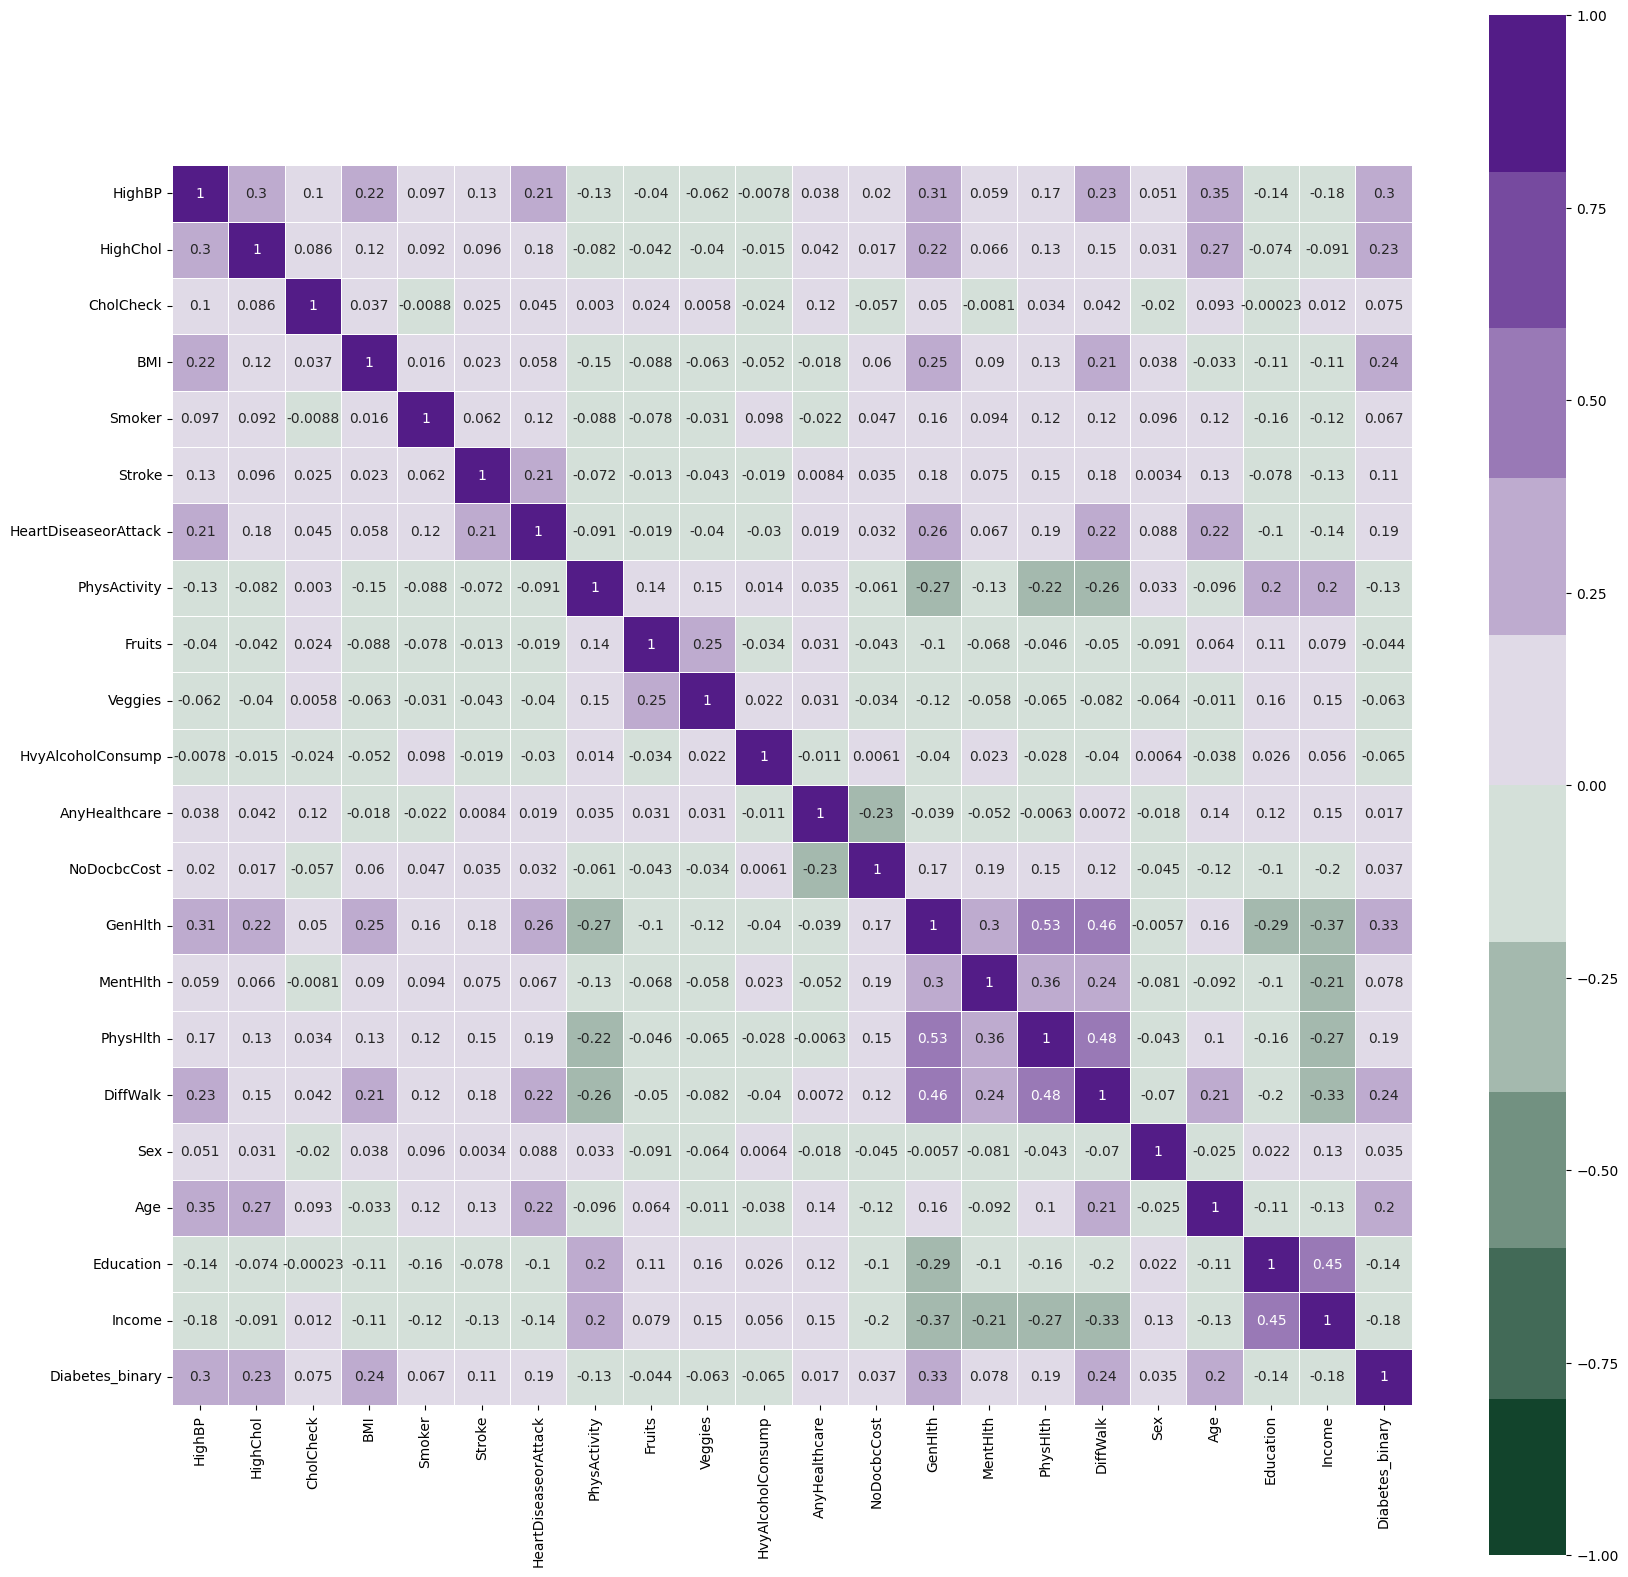

In [17]:
# Calculates the correlation between X_train and y_train
correlation_matrix = df_concat.corr()
# Sets color boundaries between [-1, 1], as well as a range of colors from dark to dark through light (0 correlation)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5)
plt.show()


interval columns not set, guessing: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']


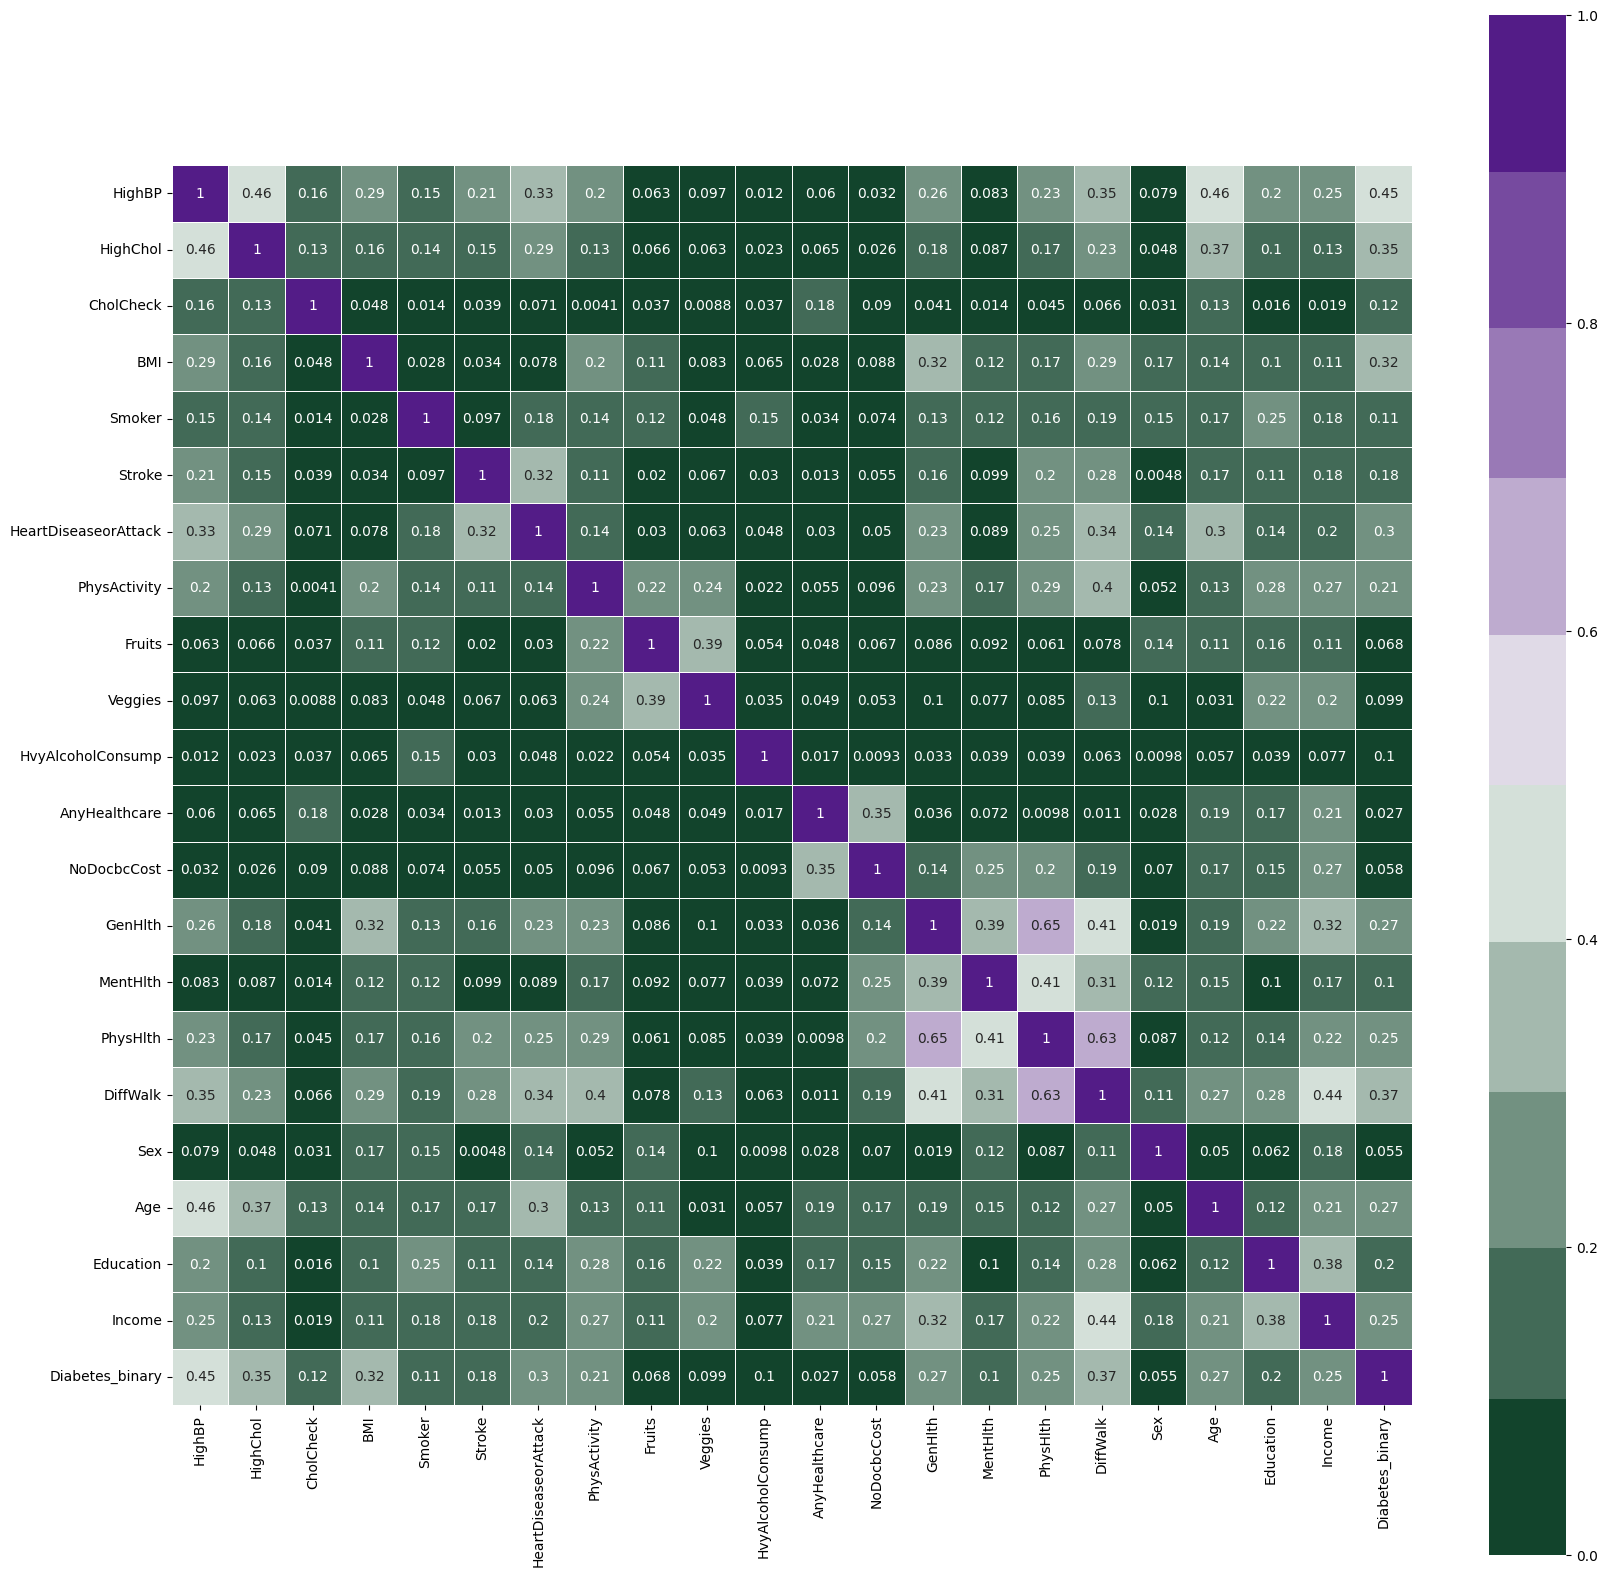

In [18]:
# Calculate the correlation matrix phi
phik_matrix = df_concat.phik_matrix()

# Set color bounds between [0, 1], with 1 being the maximum correlation
plt.figure(figsize=(20, 20))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0.5,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5)
plt.show()


# 6. Transformaciones de features
En este caso el df se encuentra limpio y escalado. No necesita a mi parecer ningun cambio

# 7. Choice of model

## Use of Neural Network with GPU 
(not found in this document)
### Comments:
- In this code, an attempt is made to use a neural network to perform classification, taking advantage of the use of GPU.
- The necessary libraries are imported, including TensorFlow and Keras.
- The data is normalized to be in a common range.
- The architecture of the neural network model is defined using dense layers.
- The model is compiled by specifying the optimizer, loss function and metrics.
- The model is trained using GPU and its performance is evaluated on the test set.

## Model Comparison and Results
(Not found in this document)
### Comments:
- In this code, three classification models are compared: Logistic Regression, Decision Tree and Random Forests.
- The models are defined and trained using CPU parallelization to take advantage of all available cores.
- The models are evaluated using evaluation metrics such as accuracy, completeness, F1-score and ROC AUC.
- The Random Forests model is selected due to its better performance in terms of evaluation metrics.


## Hyperparameter Search with Grid Search
(Not found in this document)
### Comments:
- In this code, a hyperparameter search is performed for the Random Forests model using Grid Search.
- The data is divided into training and test sets.
- The Random Forest model and the grid of hyperparameters to be explored are defined.
- Cross-validation is used to evaluate different combinations of hyperparameters.
- The model with the best hyperparameters found by Grid Search is selected.
- The final model is evaluated on the test set and the evaluation metrics and best hyperparameters are displayed.



Confusion Matrix:
[[91781  1733]
 [ 2251 19846]]


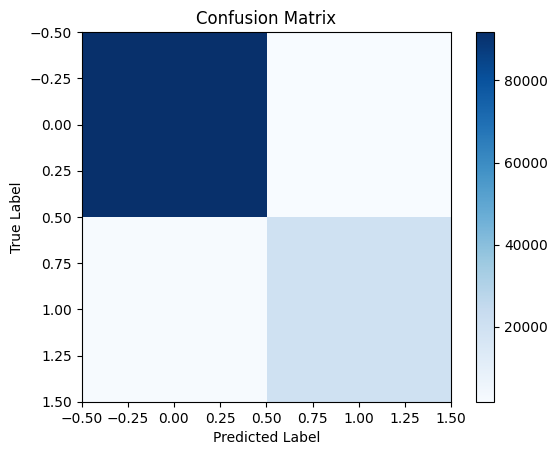

Accuracy: 0.9655396112826634
Precision: 0.9196904397794152
Recall: 0.8981309680047065
F1-score: 0.9087828555728547
ROC AUC: 0.9397994917445095


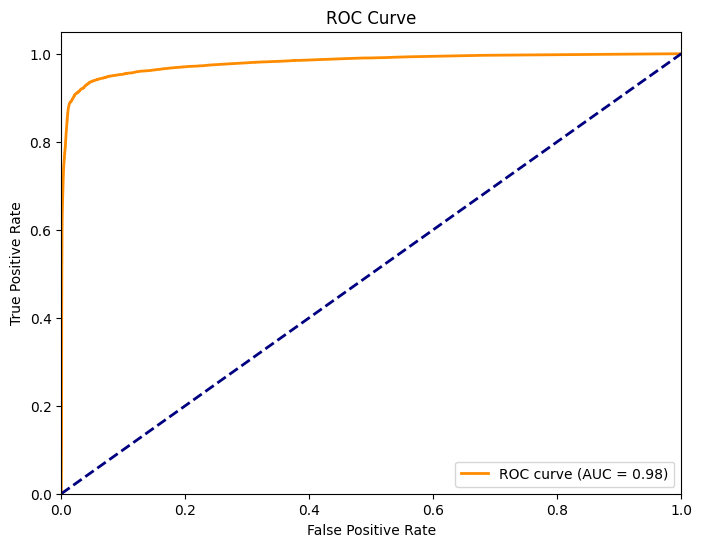

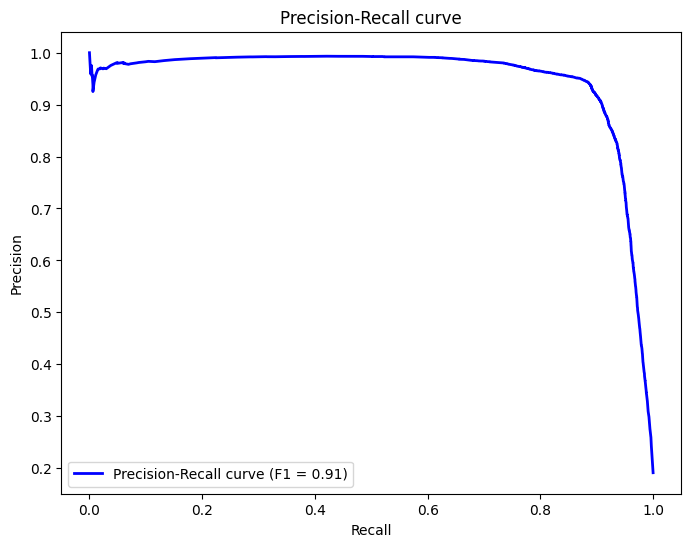

In [20]:
# Define the hyperparameters
params = {'max_depth': None,
          'min_samples_leaf': 1,
          'min_samples_split': 2,
          'n_estimators': 300}

# Initialize the model
rf_model = RandomForestClassifier(**params,n_jobs=-1)

rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate the performance indicators
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance indicators
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

# Calculate the class 1 probability for the ROC curves
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate true positive rate, false positive rate and threshold for ROC curves.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the precision-recall curve and the F1-score
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (F1 = {f1:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='lower left')
plt.show()






In [21]:
# save de model
with open('random_forest_model_eng.pkl', 'wb') as file:
    pickle.dump(rf_model, file)